In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/AI4GoodE1/AI4GoodE1/main/fraud_email_preprocessed.csv')
df.head()

,Text,Class
0,supply quality china s exclusive dimensions at...,1
1,over sidlet me know thx,0
2,dear friend greetings to you i wish to accost ...,1
3,mr cheung puihang seng bank ltd des voeux rd ...,1
4,not a surprising assessment from embassy,0


In [48]:
df_final = df['Text']
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

bow = []
for message in df_final:
    words = word_tokenize(message)
    for w in words:
        bow.append(w)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anger\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer()
tfidf_vec=tfidf_model.fit_transform(df_final)
tfidf_data=pd.DataFrame(tfidf_vec.toarray())

print(tfidf_data.size)

841893856


In [50]:
from sklearn.decomposition import TruncatedSVD 

svd = TruncatedSVD(n_components=350, algorithm='randomized')
df_svd = svd.fit_transform(tfidf_data)

In [51]:
print(tfidf_data)

       0      1      2      3      4      5      6      7      8      9      \
0        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
10244    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10245    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10246    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10247    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10248    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  82134  82135  82136  82137  82138  8213

In [52]:
df_new = pd.DataFrame(df_svd)

df_train = df_new.iloc[:4457]
df_test = df_new.iloc[4457:]

target = df['Class']
df_train['Class'] = target

Y = df_train['Class']
X = df_train.drop('Class',axis=1)

<ipython-input-52-5b89dd3b9e76>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Class'] = target


In [53]:
from sklearn import model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,test_size=.35, random_state=42)

In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
# Fitting the Multinomial Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [56]:
# Using this class to make my print statement look bold
class color:
    BOLD = '\033[1m'

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.01, 0.1, 0.19, 0.195, 0.18, 0.17, 0.21, 0.22, 0.23, 0.24, 0.2, 0.3, 0.5, 1.0, 2, 3, 4, 10.0]}

cv = KFold(n_splits=18, random_state=42, shuffle=True)
clf = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, scoring='accuracy')

clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=18, random_state=42, shuffle=True),
             estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.19, 0.195, 0.18, 0.17, 0.21,
                                   0.22, 0.23, 0.24, 0.2, 0.3, 0.5, 1.0, 2, 3,
                                   4, 10.0]},
             scoring='accuracy')

In [58]:
y_pred=clf.predict(X_test)
print(color.BOLD +'Confusion Matrix:\n', confusion_matrix(y_test,y_pred))
print('-----------------------------------------------------------------------')
print(color.BOLD +'Accuracy Score:', accuracy_score(y_test,y_pred))
print('-----------------------------------------------------------------------')

# Predicting and calculating f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_pred, y_test)
f1_round = round(f1,2)

print(color.BOLD + 'F1 score:',f1_round)
print('-----------------------------------------------------------------------')
print('Classification Report:')
print(color.BOLD +'\n',classification_report(y_test,y_pred))
print('-----------------------------------------------------------------------')

Confusion Matrix:
 [[873   5]
 [152 530]]
-----------------------------------------------------------------------
Accuracy Score: 0.8993589743589744
-----------------------------------------------------------------------
F1 score: 0.87
-----------------------------------------------------------------------
Classification Report:

               precision    recall  f1-score   support

           0       0.85      0.99      0.92       878
           1       0.99      0.78      0.87       682

    accuracy                           0.90      1560
   macro avg       0.92      0.89      0.89      1560
weighted avg       0.91      0.90      0.90      1560

-----------------------------------------------------------------------


In [59]:
print('Training Accuracy : %.3f' %clf.score(X_train, y_train))
print('Test Accuracy : %.3f' %clf.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f' %clf.best_score_)
print('Best Parameters : ', clf.best_params_)

Training Accuracy : 0.903
Test Accuracy : 0.899
Best Accuracy Through Grid Search : 0.900
Best Parameters :  {'alpha': 1.0}


In [60]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, y_pred, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc score
auc_score = roc_auc_score(y_test, y_pred)

print(auc_score)

0.8857156694433497


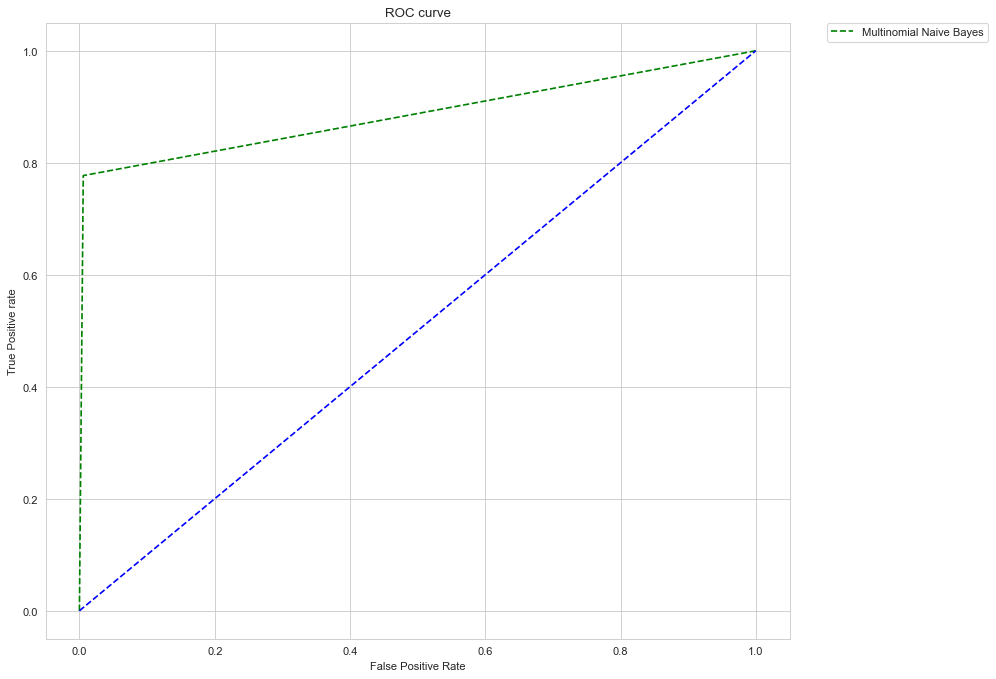

In [61]:
# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns
sns.set_style("whitegrid")

# Changing image size
from matplotlib.pyplot import figure
figure(figsize=(12, 10), dpi=80)

# Plot roc curves
plt.plot(fpr, tpr, linestyle='--', color='green', label='Multinomial Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# Title
plt.title('ROC curve')

# X-label
plt.xlabel('False Positive Rate')

# Y-label
plt.ylabel('True Positive rate')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()